###  Created by Luis A. Sanchez-Perez (alejand@umich.edu).
<p><span style="color:green"><b>Copyright &#169;</b> Do not distribute or use without authorization from author.</span></p>

In [1]:
import numpy as np
import numpy.random as rnd
import numpy.linalg as alg
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler

In [2]:
# Generates sampled data with noise
rnd.seed(10)
m = 20
x = np.linspace(0,20,m).reshape((m,1))
poly = PolynomialFeatures(degree = 2)
X = poly.fit_transform(x)
sigma = 2
wreal = [-1.5, 1/9]
y = X[:,1:3].dot(wreal) + rnd.normal(0,sigma,m)

In [3]:
# Generates dataset using polynomial features
d = 14
poly = PolynomialFeatures(degree = d)
X = poly.fit_transform(x)
scaler = StandardScaler()
X[:,1:] = scaler.fit_transform(X[:,1:])

In [4]:
# Generates mesh
pts = 100
x = np.linspace(0,20,pts).reshape((pts,1))
mesh = poly.fit_transform(x)
mesh[:,1:] = scaler.transform(mesh[:,1:])

### MLE Estimation (Least Squares)

In [5]:
# MLE estimation
wmle = alg.inv(X.T.dot(X)).dot(X.T).dot(y)
print(wmle)
wmle = alg.pinv(X).dot(y)
print(wmle)
wmle = alg.lstsq(X,y,rcond=None)[0]
print(wmle)
# Best estimate of uncertainty (sqrt of empirical variance of residual errors)
sigma = np.sqrt(((y - (X.dot(wmle)))**2).sum() / m)
sigma

[ 4.42117320e-01  8.49647977e+01 -4.35143311e+03  5.93840890e+04
 -4.14145012e+05  1.72751234e+06 -4.59984802e+06  7.88127341e+06
 -7.94728908e+06  2.22824925e+06  6.06670596e+06 -1.01447152e+07
  7.71060856e+06 -3.08965077e+06  5.26200810e+05]
[ 4.42117320e-01  3.31634694e+02 -1.57302763e+04  2.53583089e+05
 -2.13465088e+06  1.07299017e+07 -3.36078012e+07  6.33408921e+07
 -5.45129938e+07 -4.26592243e+07  1.87581227e+08 -2.52129564e+08
  1.82906465e+08 -7.17266543e+07  1.19742227e+07]
[ 4.42117320e-01  3.31634694e+02 -1.57302763e+04  2.53583089e+05
 -2.13465088e+06  1.07299017e+07 -3.36078012e+07  6.33408921e+07
 -5.45129938e+07 -4.26592243e+07  1.87581227e+08 -2.52129564e+08
  1.82906465e+08 -7.17266543e+07  1.19742227e+07]


0.8134893845637191

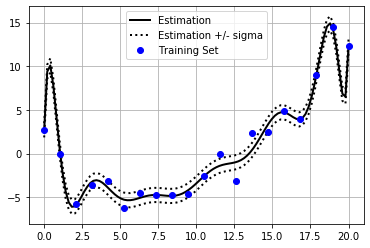

In [6]:
# Plotting results
y_pred =  mesh.dot(wmle)
temp = scaler.inverse_transform(mesh[:,1:])
plt.plot(temp[:,0],y_pred,'k-', linewidth = 2, label = 'Estimation')
plt.plot(temp[:,0],y_pred + sigma,'k:', linewidth = 2, label = 'Estimation +/- sigma')
plt.plot(temp[:,0],y_pred - sigma,'k:', linewidth = 2)
temp = scaler.inverse_transform(X[:,1:])
plt.plot(temp[:,0],y,'b.', linewidth = 2, label = 'Training Set', markersize = 12)
plt.grid()
plt.legend()

### MAP Estimation (Ridge Regression)

In [7]:
# MAP estimation
regularization = 0.1
diagonal = np.diag(np.concatenate(([0], regularization * np.ones(d))))
XX = np.concatenate((X, np.sqrt(diagonal)))
yy = np.concatenate((y, np.zeros(d + 1)))
wmap = alg.inv(X.T.dot(X) + diagonal).dot(X.T).dot(y)
print(wmap)
wmap = alg.pinv(XX).dot(yy)
print(wmap)
wmap = alg.lstsq(XX,yy,rcond=None)[0]
print(wmap)
sigma = np.sqrt(((y - X.dot(wmap))**2).sum() / m)
sigma

[ 0.44211732 -5.97865333  5.59751973  4.10261587  1.8540525   0.48883971
 -0.07230602 -0.14855392 -0.01296049  0.14819343  0.22229879  0.14948602
 -0.09515879 -0.51458664 -1.09869941]
[ 0.44211732 -5.97865333  5.59751973  4.10261587  1.8540525   0.48883971
 -0.07230602 -0.14855392 -0.01296049  0.14819343  0.22229879  0.14948602
 -0.09515879 -0.51458664 -1.09869941]
[ 0.44211732 -5.97865333  5.59751973  4.10261587  1.8540525   0.48883971
 -0.07230602 -0.14855392 -0.01296049  0.14819343  0.22229879  0.14948602
 -0.09515879 -0.51458664 -1.09869941]


1.7345032187560294

In [8]:
# Ridge regression and centering data
w0 = y.mean()
print(w0)
diagonal = np.diag(regularization * np.ones(d))
w = alg.inv(X[:,1:].T.dot(X[:,1:]) + diagonal).dot(X[:,1:].T).dot(y)
print(w)

0.442117320399454
[-5.97865333  5.59751973  4.10261587  1.8540525   0.48883971 -0.07230602
 -0.14855392 -0.01296049  0.14819343  0.22229879  0.14948602 -0.09515879
 -0.51458664 -1.09869941]


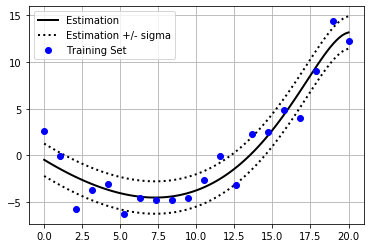

In [9]:
y_pred =  mesh.dot(wmap)
temp = scaler.inverse_transform(mesh[:,1:])
plt.plot(temp[:,0],y_pred,'k-', linewidth = 2, label = 'Estimation')
plt.plot(temp[:,0],y_pred + sigma,'k:', linewidth = 2, label = 'Estimation +/- sigma')
plt.plot(temp[:,0],y_pred - sigma,'k:', linewidth = 2)
temp = scaler.inverse_transform(X[:,1:])
plt.plot(temp[:,0],y,'b.', linewidth = 2, label = 'Training Set', markersize = 12)
plt.grid()
plt.legend()